In [27]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import random
import time, pickle
from scipy import signal

In [28]:
#Initial
AF_0 = []
AF_d = []

lamda = 1  # wavelength
d = lamda / 2  # wavelength is 1m
k = 2 * np.pi / lamda

theta = np.arange(-90, 91, 1)
thetai = np.array([14])
lb = -0.1
ub = 0.1
Npop = 50  # number of bat
Max_iteration = 100  # Iteration
MAX_MC = 200 # Montecarlord iteration
# b = 1
c = 10000  # Penalty parameter
A = 0.5  # Loudness  (constant or decreasing)
r = 0.5  # Pulse rate (constant or decreasing)
Qmin = 0  # Frequency minimum
Qmax = 1  # Frequency maximum
numAnt = 100
I = np.isin(theta,thetai)
theta_k = theta[~I]
start_time = time.time()

dim = int(numAnt/2)
wd = signal.chebwin(numAnt, at=30)


<ipython-input-28-27264656805c>:28: DeprecationWarning: Importing chebwin from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.chebwin' or the convenience function 'scipy.signal.get_window' instead.
  wd = signal.chebwin(numAnt, at=30)


In [29]:
def tinhAF(w,theta):
  t = w.reshape(-1, 1) * np.exp(1j * k * np.outer(np.arange(numAnt), d * np.sin(np.radians(theta))))
  return t.sum(axis=0)

In [30]:
def objf(theta, thetai, half_delta, wd):
  delta = [half_delta, -np.flip(half_delta)]
  delta = np.concatenate(delta)
  wo = wd * np.exp(1j*delta)
  F1 = np.sum(np.power(np.abs(tinhAF(wo, theta_k) - tinhAF(wd, theta_k)), 2))
  return F1

In [31]:
class solution:
  def __init__(self):
    self.best = 0
    self.bestIndividual = []
    self.convergence = []
    self.optimizer = ""
    self.objfname = ""
    self.startTime = 0
    self.endTime = 0
    self.executionTime = 0
    self.lb = 0
    self.ub = 0
    self.dim = 0
    self.popnum = 0
    self.maxiers = 0
    pass
  pass

In [32]:
def BAT(lb, ub, dim, Npop, Max_iteration):
  n = Npop  # Population size
  if not isinstance(lb, list):
    lb = [lb] * dim
  if not isinstance(ub, list):
    ub = [ub] * dim

  d = dim  # Number of dimensions

  # Initializing arrays
  Q = np.zeros(n)  # Frequency
  v = np.zeros((n, d))  # Velocities
  Convergence_curve = []

  # Initialize the population/solutions
  Sol = np.zeros((n, d))
  for i in range(dim):
    Sol[:, i] = np.random.rand(n) * (ub[i] - lb[i]) + lb[i]

  S = np.zeros((n, d))
  S = np.copy(Sol)
  Fitness = np.zeros(n)

  # initialize solution for the final results
  s = solution()

  # Initialize timer for the experiment
  flag = 0
  timerStart = time.time()
  s.startTime = time.strftime("%Y-%m-%d-%H-%M-%S")

  # Evaluate initial random solutions
  for i in range(0, n):
    Fitness[i] = np.squeeze(objf(theta, thetai, Sol[i, :], wd))
  # Find the initial best solution and minimum fitness
  I = np.argmin(Fitness)
  best = Sol[I, :]
  fmin = min(Fitness)

  # Main loop
  for t in range(0, Max_iteration):  # Loop over all bats(solutions)
    for i in range(0, n):
      Q[i] = Qmin + (Qmin - Qmax) * random.random()
      v[i, :] = v[i, :] + (Sol[i, :] - best) * Q[i]
      S[i, :] = Sol[i, :] + v[i, :]
      Sol[i, :] = np.clip(Sol[i, :], lb[:], ub[:])

      # Pulse rate
      if random.random() > r:
        S[i, :] = best + 0.01 * np.random.randn(d)

      # Evaluate new solutions
      Fnew = np.squeeze(objf(theta, thetai, S[i, :], wd))

      # Update if the solution improves
      if (Fnew <= Fitness[i]) and (random.random() < A):
        Sol[i, :] = np.copy(S[i, :])
        Fitness[i] = Fnew

      if Fnew <= fmin:
        best = np.copy(S[i, :])
        fmin = Fnew
        pass
      pass  # end Loop over all bats(solutions)

    # update convergence curve
    Convergence_curve.append(fmin)

    if t % 1 == 0:
      print(["At iteration " + str(t) + " the best fitness is " + str(fmin)])
    pass  # end Main loop

  timerEnd = time.time()
  s.endTime = time.strftime("%Y-%m-%d-%H-%M-%S")
  s.executionTime = timerEnd - timerStart
  s.convergence = Convergence_curve
  s.optimizer = "BAT"
  s.bestIndividual = best
  s.objfname = objf.__name__
  return s

Streaming output truncated to the last 5000 lines.
['At iteration 51 the best fitness is 0.9505606187868683']
['At iteration 52 the best fitness is 0.9505606187868683']
['At iteration 53 the best fitness is 0.9175098344645236']
['At iteration 54 the best fitness is 0.9175098344645236']
['At iteration 55 the best fitness is 0.9175098344645236']
['At iteration 56 the best fitness is 0.9175098344645236']
['At iteration 57 the best fitness is 0.9175098344645236']
['At iteration 58 the best fitness is 0.9175098344645236']
['At iteration 59 the best fitness is 0.9175098344645236']
['At iteration 60 the best fitness is 0.9175098344645236']
['At iteration 61 the best fitness is 0.9175098344645236']
['At iteration 62 the best fitness is 0.9175098344645236']
['At iteration 63 the best fitness is 0.9175098344645236']
['At iteration 64 the best fitness is 0.9175098344645236']
['At iteration 65 the best fitness is 0.7219805953567275']
['At iteration 66 the best fitness is 0.7219805953567275']
['At 

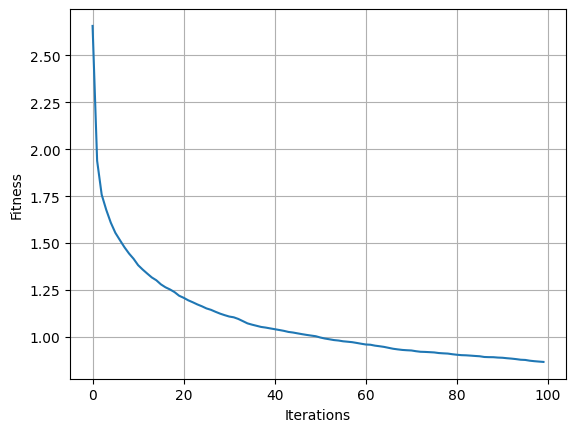

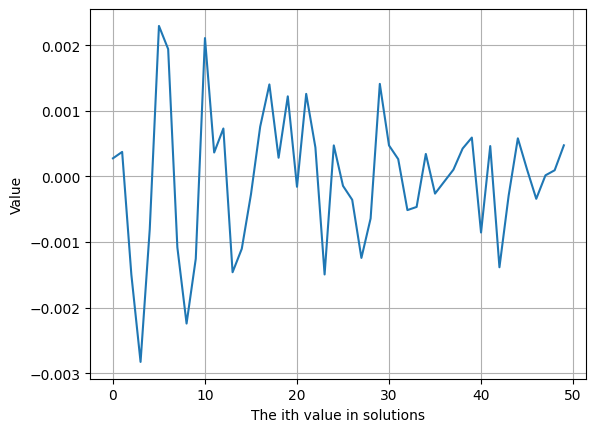

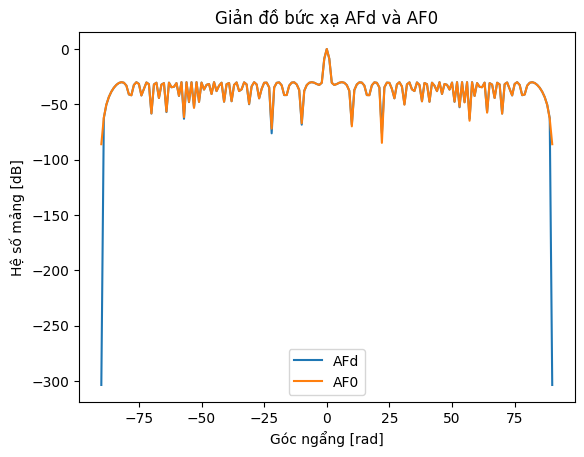

Thời gian chạy: 2627.283772945404 giây


In [33]:
executionTime_MC = []
convergence_MC = []
bestIndividual_MC = []
for ind in range(MAX_MC):
  print('MAC:',ind)
  s = BAT(lb, ub, dim, Npop, Max_iteration)
  executionTime_MC.append(s.executionTime) # time execution
  convergence_MC.append(s.convergence)
  bestIndividual_MC.append(s.bestIndividual)
  pass

executionTime_aver = np.mean(executionTime_MC,0)
convergence_aver = np.mean(convergence_MC,0)
bestIndividual_aver = np.mean(bestIndividual_MC,0)

delta = np.concatenate((bestIndividual_aver, -np.flip(bestIndividual_aver)))
wo = wd * np.exp(1j*delta)
for i in theta:
  AF_0.append(np.power(np.abs(tinhAF(wo, i)), 2))
  AF_d.append(np.power(np.abs(tinhAF(wd, i)), 2))

P_db0 = 10 * np.log10(AF_0)
P_db0 = P_db0 - np.max(P_db0)


P_dbd = 10 * np.log10(AF_d)
P_dbd = P_dbd - np.max(P_dbd)
print("giá trị max của AF_d: " + str(np.max(AF_d)))
print("giá trị max của AF0: " + str(np.max(AF_0)))
end_time = time.time()

# Visualize
plt.figure(1)
plt.plot(np.arange(Max_iteration), convergence_aver)
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.grid()

plt.figure(2)
plt.plot(np.arange(dim), bestIndividual_aver)
plt.xlabel("The ith value in solutions")
plt.ylabel("Value")
plt.grid()

plt.figure(3)
plt.title("Giản đồ bức xạ AFd và AF0")
plt.xlabel("Góc ngẩng [rad]")
plt.ylabel("Hệ số mảng [dB]")
plt.plot(theta , P_dbd - np.max(P_dbd), label="AFd")
plt.plot(theta , P_db0 - np.max(P_db0), label="AF0")
plt.legend()
plt.show()


# Tính thời gian chạy
execution_time = end_time - start_time

# Print results
print(f"Thời gian chạy: {execution_time} giây")